<a href="https://colab.research.google.com/github/UlitiM2/2zadanie/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%2C%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/lab2_Ulitina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Инструменты для анализа и предобработки данных

Цель данной лабораторной работы - вспомнить инструментарий pandas, SQL и matplotlib для проведения анализа и предобработки данных.

С точки зрения машинного обучения в данной работе будет рассмотрен алгоритм kNN, алгоритм кластеризации kMeans, а также некоторые методы снижения размерности.

Датасет, с которым вам предстоит работать, содержит информацию о покупателях в одном из магазинов. Данные разделены на несколько файлов.
<br><br>
**people**

`id`: уникальный идентификатор клиента

`year_birth`: год рождения клиента

`education`: уровень образования клиента

`marital_status`: семейное положение клиента

`income`: годовой доход семьи клиента

`kidhome`: количество детей в доме клиента

`teenhome`: количество подростков в доме клиента

`dt_customer`: дата регистрации клиента в компании

`recency`: количество дней с момента последней покупки клиента

`complain`: 1, если клиент жаловался в последние 2 года, 0 в противном случае
<br><br>
**products**

`id`: уникальный идентификатор клиента

`mntwines`: сумма, потраченная на вино за последние 2 года

`mntfruits`: сумма, потраченная на фрукты за последние 2 года

`mntmeatproducts`: сумма, потраченная на мясные продукты за последние 2 года

`mntfishproducts`: сумма, потраченная на рыбу за последние 2 года

`mntsweetproducts`: сумма, потраченная на сладости за последние 2 года

`mntgoldprods`: сумма, потраченная на золото за последние 2 года
<br><br>
**purchases**

`id`: уникальный идентификатор клиента

`numwebpurchases`: количество покупок через веб-сайт компании

`numcatalogpurchases`: количество покупок с использованием каталога

`numstorepurchases`: количество покупок непосредственно в магазинах

`numwebvisitsmonth`: количество посещений веб-сайта компании в последний месяц

`numdealspurchases`: количество покупок скидочных товаров

In [ ]:
!gdown 1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
!unzip customers.zip

Downloading...
From: https://drive.google.com/uc?id=1LUjAJR6hNs5IAnQscisvM2hUemvYRLWy
To: /content/customers.zip
100% 66.6k/66.6k [00:00<00:00, 51.2MB/s]
Archive:  customers.zip
  inflating: products.csv            
  inflating: people.csv              
  inflating: purchases.csv           


## pandas, sql

Прочитайте данные. Сколько строк и столбцов содержат таблицы? Есть ли в данных пропуски?

In [ ]:
import pandas as pd
products = pd.read_csv('products.csv', sep ='\t')
people = pd.read_csv('people.csv', sep =';')
purchases = pd.read_csv('purchases.csv')

In [ ]:
print("Таблица products:")
print(f"Строк: {products.shape[0]}, Столбцов: {products.shape[1]}")
print("Пропуски:")
print(products.isnull().sum())

print("\nТаблица people:")
print(f"Строк: {people.shape[0]}, Столбцов: {people.shape[1]}")
print("Пропуски:")
print(people.isnull().sum())

print("\nТаблица purchases:")
print(f"Строк: {purchases.shape[0]}, Столбцов: {purchases.shape[1]}")
print("Пропуски:")
print(purchases.isnull().sum())

Таблица products:
Строк: 2240, Столбцов: 7
Пропуски:
id                  0
mntwines            0
mntfruits           0
mntmeatproducts     0
mntfishproducts     0
mntsweetproducts    0
mntgoldprods        0
dtype: int64

Таблица people:
Строк: 2240, Столбцов: 10
Пропуски:
id                 0
year_birth         0
education          0
marital_status     0
income            24
kidhome            0
teenhome           0
dt_customer        0
recency            0
complain           0
dtype: int64

Таблица purchases:
Строк: 2240, Столбцов: 6
Пропуски:
id                     0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
dtype: int64


Каждое из следующих заданий необходимо выполнить двумя способами - с помощью pandas и с помощью SQL. Не используйте объединение таблиц через join/merge/concat.

In [ ]:
import sqlite3

conn = sqlite3.connect(':memory:')  # создание временной базы данных

people.to_sql('people', conn, index=False)
products.to_sql('products', conn, index=False)
purchases.to_sql('purchases', conn, index=False)

query = "SELECT * FROM people LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0


In [ ]:
query = "SELECT * FROM purchases LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5


In [ ]:
query = "SELECT * FROM products LIMIT 5;"
result = pd.read_sql_query(query, conn)
result

,id,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15


In [ ]:
def execute_query(query):
    result = pd.read_sql_query(query, conn)
    return result

print("Таблица products:")
print(execute_query("SELECT COUNT(*) FROM products"))
print(execute_query("PRAGMA table_info(products)"))

print("\nТаблица people:")
print(execute_query("SELECT COUNT(*) FROM people"))
print(execute_query("PRAGMA table_info(people)"))

print("\nТаблица purchases:")
print(execute_query("SELECT COUNT(*) FROM purchases"))
print(execute_query("PRAGMA table_info(purchases)"))

Таблица products:
   COUNT(*)
0      2240
   cid              name     type  notnull dflt_value  pk
0    0                id  INTEGER        0       None   0
1    1          mntwines  INTEGER        0       None   0
2    2         mntfruits  INTEGER        0       None   0
3    3   mntmeatproducts  INTEGER        0       None   0
4    4   mntfishproducts  INTEGER        0       None   0
5    5  mntsweetproducts  INTEGER        0       None   0
6    6      mntgoldprods  INTEGER        0       None   0

Таблица people:
   COUNT(*)
0      2240
   cid            name     type  notnull dflt_value  pk
0    0              id  INTEGER        0       None   0
1    1      year_birth  INTEGER        0       None   0
2    2       education     TEXT        0       None   0
3    3  marital_status     TEXT        0       None   0
4    4          income     REAL        0       None   0
5    5         kidhome  INTEGER        0       None   0
6    6        teenhome  INTEGER        0       None   0
7    

In [ ]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)['name'].tolist()

for table in tables:
    print(f"\n Таблица: {table}")
    columns = pd.read_sql_query(f"PRAGMA table_info({table});", conn)['name'].tolist()

    select_clause = []
    for column in columns:
        select_clause.append(f"SUM(CASE WHEN {column} IS NULL THEN 1 ELSE 0 END) AS null_{column}")
    query = f"SELECT {', '.join(select_clause)} FROM {table};"

    null_counts = pd.read_sql_query(query, conn)
    print(null_counts)


 Таблица: people
   null_id  null_year_birth  null_education  null_marital_status  null_income  \
0        0                0               0                    0           24   

   null_kidhome  null_teenhome  null_dt_customer  null_recency  null_complain  
0             0              0                 0             0              0  

 Таблица: products
   null_id  null_mntwines  null_mntfruits  null_mntmeatproducts  \
0        0              0               0                     0   

   null_mntfishproducts  null_mntsweetproducts  null_mntgoldprods  
0                     0                      0                  0  

 Таблица: purchases
   null_id  null_numdealspurchases  null_numwebpurchases  \
0        0                       0                     0   

   null_numcatalogpurchases  null_numstorepurchases  null_numwebvisitsmonth  
0                         0                       0                       0  


### 1

Найдите абсолютную разницу между минимальным доходом клиентов с детьми и максимальным доходом клиентов без детей. Учитывайте только столбец `kidhome`.

In [ ]:
# PUT YOUR PANDAS CODE HERE

min_income_with_kids = people[people['kidhome'] > 0]['income'].min()
max_income_no_kids = people[people['kidhome'] == 0]['income'].max()
absolute_difference = abs(min_income_with_kids - max_income_no_kids)

print(f"Абсолютная разница: {absolute_difference}")

Абсолютная разница: 158356.0


In [ ]:
# PUT YOUR SQL CODE HERE
query = """
WITH
    min_income_with_kids AS (
        SELECT MIN(income) AS min_income
        FROM people
        WHERE kidhome > 0
    ),
    max_income_no_kids AS (
        SELECT MAX(income) AS max_income
        FROM people
        WHERE kidhome = 0
    )
SELECT ABS(min_income_with_kids.min_income - max_income_no_kids.max_income) AS absolute_difference
FROM min_income_with_kids, max_income_no_kids;
"""

result = pd.read_sql_query(query, conn)
print(result)

   absolute_difference
0             158356.0


### 2
Посчитайте процентное соотношение клиентов, имеющих PhD или другой уровень образования, среди клиентов, покупающих и не покупающих сладкое. Ответ представьте в виде:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <style>
        th, td {
            text-align: center;
            padding: 10px;
        }
        th {
            font-weight: bold;
        }
    </style>
</head>
<body>

<table border="1">
  <tr>
    <th></th>
    <th>PhD</th>
    <th>Other</th>
  </tr>
  <tr>
    <th>Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
  <tr>
    <th>No Sweets</th>
    <td>percentage</td>
    <td>percentage</td>
  </tr>
</table>

</body>
</html>

Сумма по строке должна давать единицу.

In [ ]:
# PUT YOUR PANDAS CODE HERE
import pandas as pd
import sqlite3

sweets_buyers = products[products['mntsweetproducts'] > 0]['id']
people['buys_sweets'] = people['id'].isin(sweets_buyers)

result = people.groupby(['buys_sweets', 'education']).size().unstack(fill_value=0)

result = result.div(result.sum(axis=1), axis=0)

result = result[['PhD']].assign(Other=1 - result['PhD'])

result.index = ['No Sweets', 'Sweets'] if False in result.index else ['Sweets', 'No Sweets']

print(result)


education       PhD     Other
No Sweets  0.365155  0.634845
Sweets     0.182867  0.817133


In [ ]:
# PUT YOUR SQL CODE HERE
query = """WITH
sweet_buyers AS (
    SELECT COUNT(*) AS total_sweet_buyers
    FROM people
    WHERE id IN (SELECT id FROM products WHERE mntsweetproducts > 0)
),
non_sweet_buyers AS (
    SELECT COUNT(*) AS total_non_sweet_buyers
    FROM people
    WHERE id IN (SELECT id FROM products WHERE mntsweetproducts = 0)
),
phd_sweet AS (
    SELECT COUNT(*) AS phd_sweet_count
    FROM people
    WHERE education = 'PhD'
    AND id IN (SELECT id FROM products WHERE mntsweetproducts > 0)
),
phd_non_sweet AS (
    SELECT COUNT(*) AS phd_non_sweet_count
    FROM people
    WHERE education = 'PhD'
    AND id IN (SELECT id FROM products WHERE mntsweetproducts = 0)
),
non_phd_sweet AS (
    SELECT COUNT(*) AS non_phd_sweet_count
    FROM people
    WHERE education != 'PhD'
    AND id IN (SELECT id FROM products WHERE mntsweetproducts > 0)
),
non_phd_non_sweet AS (
    SELECT COUNT(*) AS non_phd_non_sweet_count
    FROM people
    WHERE education != 'PhD'
    AND id IN (SELECT id FROM products WHERE mntsweetproducts = 0)
)

SELECT
    'Sweets',
    ROUND(CAST((SELECT phd_sweet_count FROM phd_sweet) AS FLOAT) / NULLIF((SELECT total_sweet_buyers FROM sweet_buyers), 0), 6) AS phd,
    ROUND(CAST((SELECT non_phd_sweet_count FROM non_phd_sweet) AS FLOAT) / NULLIF((SELECT total_sweet_buyers FROM sweet_buyers), 0), 6) AS other

UNION ALL

SELECT
    'No Sweets',
    ROUND(CAST((SELECT phd_non_sweet_count FROM phd_non_sweet) AS FLOAT) /  NULLIF((SELECT total_non_sweet_buyers FROM non_sweet_buyers), 0), 6),
    ROUND(CAST((SELECT non_phd_non_sweet_count FROM non_phd_non_sweet) AS FLOAT) /  NULLIF((SELECT total_non_sweet_buyers FROM non_sweet_buyers), 0), 6)"""

result = pd.read_sql_query(query, conn)
print(result)

    'Sweets'       phd     other
0     Sweets  0.182867  0.817133
1  No Sweets  0.365155  0.634845


## EDA

Изучите графики, которые предлагает построить Google Colab. Какие из них несут смысл, а какие выглядят бесполезными? На основании изученных графиков сформулируйте любую гипотезу по данным и постройте график, который поможет подтвердить или опровергнуть вашу гипотезу. Ваш график должен отличаться от уже представленных!

In [ ]:
people

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,0


In [ ]:
people['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

хорошие графики: 2-7,16-17

остальные графики не очень удачные, так как многие из них связаны с id, а это не несет полезной информации. некоторые не показательны(например, 13-15)

In [ ]:
products

,id,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
0,5524,635,88,546,172,88,88
1,2174,11,1,6,2,1,6
2,4141,426,49,127,111,21,42
3,6182,11,4,20,10,3,5
4,5324,173,43,118,46,27,15
...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247
2236,4001,406,0,30,0,0,8
2237,7270,908,48,217,32,12,24
2238,8235,428,30,214,80,30,61


хорошие графики: 2-4 и могут быть полезны 6-8(но по ним неособо видно зависимости)

остальные графики либо не несут полезной информации, либо связаны с id

In [ ]:
purchases

,id,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth
0,5524,3,8,10,4,7
1,2174,2,1,1,2,5
2,4141,1,8,2,10,4
3,6182,2,2,0,4,6
4,5324,5,5,3,6,5
...,...,...,...,...,...,...
2235,10870,2,9,3,4,5
2236,4001,7,8,2,5,7
2237,7270,1,2,3,13,6
2238,8235,2,6,5,10,3


хорошие графики: 2-4

остальные графики либо не несут полезной информации, либо связаны с id

Гипотеза: Доход людей с образованием PhD выше, чем доход людей с образованием Basic

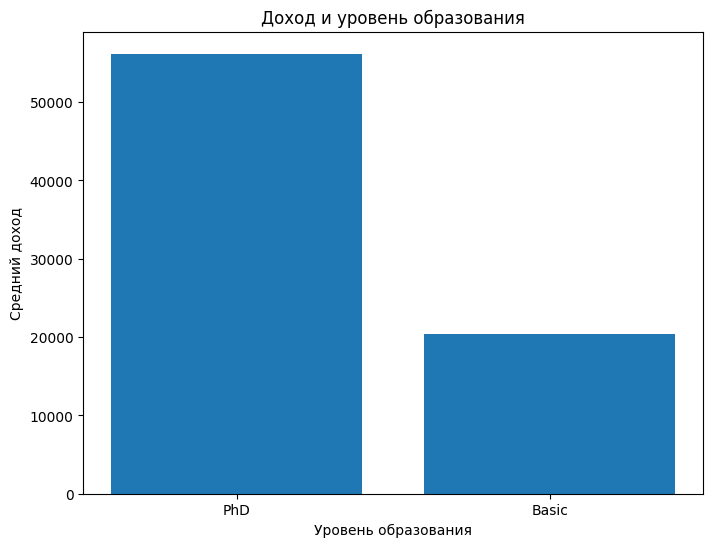

In [ ]:
# PUT YOUR CODE HERE
import matplotlib.pyplot as plt

people_PHD = people[people['education'] == 'PhD']['income'].mean()
people_Basic = people[people['education'] == 'Basic']['income'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['PhD', 'Basic'], [people_PHD, people_Basic])
plt.title('Доход и уровень образования')
plt.ylabel('Средний доход')
plt.xlabel('Уровень образования')
plt.show()


Гипотеза подтверждена, различия в заработке около 30000

## Предобработка данных

Соберём разрозненные таблицы в одну (и порадуемся, что их объём позволяет это сделать). Как мы помним, в данных были пропуски.

In [ ]:
df = pd.merge(pd.merge(people, products, on='id'), purchases, on='id')
df.isna().sum()

,0
id,0
year_birth,0
education,0
marital_status,0
income,24
kidhome,0
teenhome,0
dt_customer,0
recency,0
complain,0


Не все алгоритмы машинного обучения умеют работать с пропусками в данных. Есть несколько стратегий для борьбы с пропусками, самая частая - заполнение пропусков модой, медианой или средним. Если пропусков слишком много, то имеет смысл выбросить соответствующую строку или столбец целиком.

Есть и более продвинутые методы, например kNN (K Nearest Neighbours). Суть данного метода заключается в том, что на основании известных признаков для объекта находятся "соседи", располагающиеся как можно ближе к исходному объекту в пространстве. Затем по этим объектам вычисляется значение недостающего признака.

Возникает два вопроса:

1. Каким образом представить объекты в пространстве?
2. Как считать расстояние между ними?

Ответ на оба — зависит от задачи. Объект обычно проще всего представить как вектор признаков. Для подсчета расстояния используются, например:
- евклидово расстояние и его общий случай (расстояние минковского);
- косинусное расстояние;
- манхэттенское расстояние
- расстояние Чебышёва;
- какое угодно, придуманное вами.

Реализуем kNN для восстановления пропущенных значений `income`. Будем считать евклидово расстояние между векторами. Сначала превратим каждую строку в числовой вектор. Для этого выполним следующие шаги:

* удалим столбец `id`

* проведём one-hot кодирование столбцов `education` и `marital_status`

* проведём нормировку (min-max scaling) столбца `dt_customer`

* проведём нормализацию (z-scaling) полученных векторов, потому что евклидово расстояние чувствительно к размерности признаков

Подумайте, почему именно такие преобразования являются необходимыми.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def preprocess_data(df):
    df_processed = df.copy()
    df_processed = df_processed.drop(columns='id')
    df_processed = pd.get_dummies(df_processed, columns=['education', 'marital_status'])
    df_processed['dt_customer'] = pd.to_datetime(df_processed['dt_customer'], dayfirst=True)
    min_date = df_processed['dt_customer'].min()
    df_processed['dt_customer'] = (df_processed['dt_customer'] - min_date).dt.days
    scaler = MinMaxScaler()
    df_processed['dt_customer'] = scaler.fit_transform(df_processed[['dt_customer']])

    return df_processed

Допишите реализацию kNN.

In [ ]:
import numpy as np
from scipy.spatial import distance

df_processed = preprocess_data(df)
complete_cases = df_processed.dropna()
missing_income = df_processed[df_processed['income'].isna()]

scaler = StandardScaler()
X_train = scaler.fit_transform(complete_cases.drop(columns='income'))
y_train = complete_cases['income'].values
X_test = scaler.transform(missing_income.drop(columns='income'))

class CustomKNeighborsRegressor:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X.values if isinstance(X, pd.DataFrame) else X
        self.y_train = y.values if isinstance(y, pd.Series) else y

        return self

    def kneighbors(self, X_test):
        X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
        distances = distance.cdist(X_test, self.X_train, 'euclidean')
        sorted_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
        neighbor_distances = np.take_along_axis(distances, sorted_indices, axis=1)

        return neighbor_distances, sorted_indices


knn_custom = CustomKNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
distances, indices = knn_custom.kneighbors(X_test)
imputed_values = np.mean(y_train[indices], axis=1)
print("Результат:", imputed_values)

Результат: [32629.66666667 41768.66666667 43762.         27205.
 31431.66666667 25721.66666667 62171.         38531.
 69299.         49783.         57141.33333333 71397.
 55060.33333333 45659.33333333 20451.66666667 42637.
 32916.33333333 49439.33333333 30499.         39685.66666667
 48549.         52731.         83005.66666667 79411.33333333]


Если вы всё сделали правильно, то результаты должны совпасть с решением "из коробки", порядок возвращаемых соседей можно не учитывать.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

df_processed = preprocess_data(df)
complete_cases = df_processed.dropna()
missing_income = df_processed[df_processed['income'].isna()]
scaler = StandardScaler()
X_train = scaler.fit_transform(complete_cases.drop(columns='income'))
y_train = complete_cases['income'].values
X_test = scaler.transform(missing_income.drop(columns='income'))

knn_sklearn = KNeighborsRegressor(n_neighbors=3, weights='uniform').fit(X_train, y_train)
imputed_values = knn_sklearn.predict(X_test)
print("Результат sklearn:", imputed_values)

Результат sklearn: [32629.66666667 41768.66666667 43762.         27205.
 31431.66666667 25721.66666667 62171.         38531.
 69299.         49783.         57141.33333333 71397.
 55060.33333333 45659.33333333 20451.66666667 42637.
 32916.33333333 49439.33333333 30499.         39685.66666667
 48549.         52731.         83005.66666667 79411.33333333]


Заполните пропуски в `income` средним значением по 3 ближайшим соседям.

In [ ]:
# PUT YOU CODE HERE
df.loc[df['income'].isna(), 'income'] = imputed_values

## Кластеризация. Методы снижения размерности

In [ ]:
%%capture
!pip install umap-learn

Раз уж мы заговорили про поиск похожих между собой объектов, обсудим также кластеризацию.

[Кластеризация](https://ru.wikipedia.org/wiki/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7) - это один из видов задач обучения без учителя. Она заключается в разбиении всех объектов на группы похожих между собой объектов и сильно отличающихся от всех остальных. Так как строгого понятия похожести объектов нет, то алгоритмов кластеризации много, а результаты их работы могут сильно зависеть от качества входных данных и подобранных гиперпараметров.

Обсудим один из самых популярных методов кластеризации - [kMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.
Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.
Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам: $$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$
Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости.
Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1. Этап кластеризации. На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2. Этап обновления центроидов. На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума, а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

_определение взято из материалов курса [ODS](https://habrahabr.ru/company/ods/)_


Посмотрим, что будет давать реализация алгоритма "из коробки" на наших данных. Возьмем только данные из таблицы продуктов.


In [ ]:
X = StandardScaler().fit_transform(products.drop(columns='id'))

Сначала нужно определиться с количеством кластеров. Для этого можно воспользоваться "методом локтя" - мы рeшаем задачу кластеризации несколько раз с разным количеством кластеров и выбираем то минимальное количество кластеров, после которого существенного улучшения не происходит. Ориентироваться будем на две метрики - kMeans.inertia_ и Silhouette Score.

**kMeans.inertia_** отражает сумму расстояний от каждой точки до центра ее кластера, возведенных в квадрат. Это значение также известно как сумма внутрикластерных квадратов (Within-Cluster Sum of Squares, WCSS). Математически инерция выражается следующим образом:

$ Inertia = \sum_{i=0}^{n}(min_{\mu_j \in C}(||x_i - \mu_j||^2)) $

Где $x_i$ - это i-й элемент выборки, $\mu_j$ - это центроид кластера $C$, а $||x_i - \mu_j||$ обозначает Евклидово расстояние между точкой $x_i$ и центроидом $\mu_j$. Инерция показывает, насколько плотно группируются объекты внутри кластеров: чем меньше значение инерции, тем ближе объекты находятся к центроидам своих кластеров.

**Silhouette Score** (Силуэт) рассчитывается как разница между средним расстоянием до объектов других кластеров (b) и средним расстоянием до объектов в том же кластере (a), деленная на максимальное из этих значений:

$s = \frac{b - a}{max(a, b)}$

Где $a$ - это среднее расстояние от объекта до других объектов в том же кластере, а $b$ - это минимальное среднее расстояние от объекта до объектов в других кластерах. Значение силуэта лежит в диапазоне от -1 до 1, где высокий положительный счет указывает на то, что объект хорошо соответствует своему кластеру и плохо соответствует соседним кластерам. Обычно, чем выше средний силуэт для всех объектов, тем лучше структурированы кластеры.

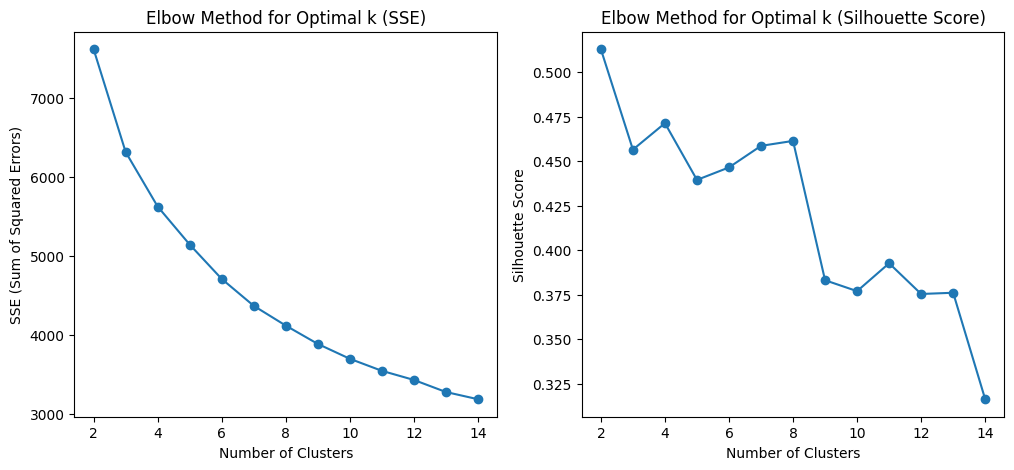

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


xaxs = list(range(2, 15))
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "random_state": 42,
    "algorithm": "lloyd"
}

silhouette_scores = []
sse = []

for k in xaxs:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 5))

# SSE
plt.subplot(1, 2, 1)
plt.plot(xaxs, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal k (SSE)')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(xaxs, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method for Optimal k (Silhouette Score)')

plt.show()

4 кластера выглядит хорошо. 8 тоже.

In [ ]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit(X)
cluster_labels = kmeans.labels_

Посмотрим на то, что получается. 6-мерный вектор будет проблематично отобразить на плоскости, поэтому прибегнем к снижению размерности - переходом в меньшее по количеству измерений признаковое пространство. Рассмотрим три подхода, имеющих реализацию "из коробки" - PCA, t-SNE, UMAP.

**PCA (метод главных компонент)** - это линейный алгоритм, который используется для уменьшения размерности данных путем проекции их на пространство меньшей размерности, сохраняя при этом максимальное количество информации в данных. Это достигается путем определения новых осей (главных компонент), которые направлены в сторону максимальной дисперсии данных. Первая главная компонента имеет наибольшую дисперсию, вторая - максимальную дисперсию среди оставшихся компонент и так далее. Для выбора количества главных компонент часто используют критерий, основанный на объясненной дисперсии, то есть на той доле общей дисперсии, которую объясняют выбранные компоненты.

**t-SNE (Стохастическое вложение соседей с t-распределением)** - это нелинейный алгоритм, который работает на основе вероятностных распределений: в многомерном пространстве данные моделируются так, что похожие объекты имеют высокую вероятность быть "соседями", в то время как непохожие объекты - низкую. Эти вероятности затем используются для определения расположения объектов в пространстве уменьшенной размерности таким образом, чтобы структура данных оставалась похожей. Чем-то напоминает kNN.


**UMAP (Uniform Manifold Approximation and Projection)** - это современный алгоритм уменьшения размерности, который можно считать конкурентом t-SNE. Он также основан на концепции многомерного многообразия, но использует другой математический подход, основанный на топологии. UMAP стремится сохранить глобальную структуру данных, в отличие от t-SNE, который фокусируется больше на локальной.

[Немного красивых картинок](https://habr.com/ru/companies/newprolab/articles/350584/)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



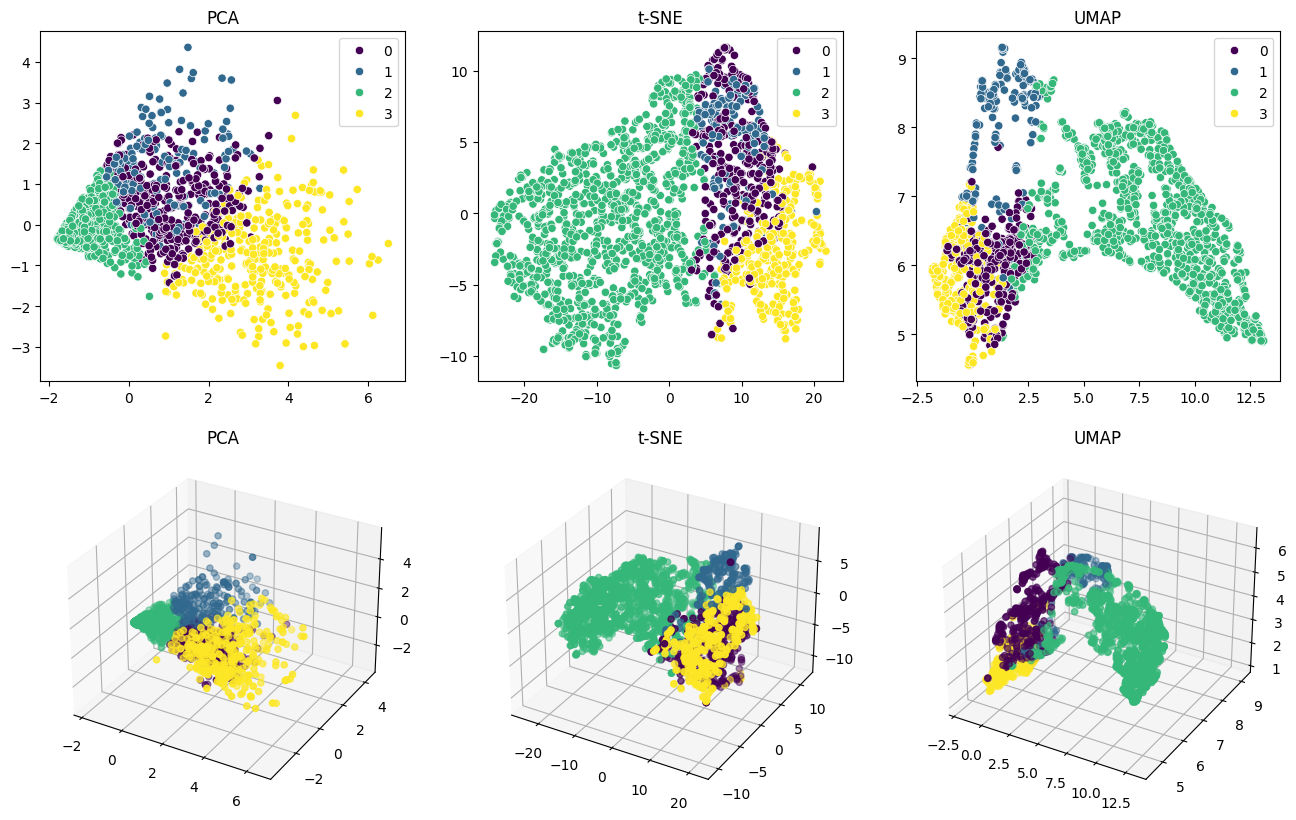

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
tsne = TSNE(n_components=3, random_state=42)
umap = UMAP(n_components=3, random_state=42)

pca_result = pca.fit_transform(X)
tsne_result = tsne.fit_transform(X)
umap_result = umap.fit_transform(X)

plt.figure(figsize=(16, 10))

# 2D Plots
plt.subplot(2, 3, 1)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('PCA')

plt.subplot(2, 3, 2)
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('t-SNE')

plt.subplot(2, 3, 3)
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], hue=cluster_labels, palette='viridis')
plt.title('UMAP')

# 3D Plots
ax1 = plt.subplot(2, 3, 4, projection='3d')
ax1.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='viridis')
ax1.set_title('PCA')

ax2 = plt.subplot(2, 3, 5, projection='3d')
ax2.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=cluster_labels, cmap='viridis')
ax2.set_title('t-SNE')

ax3 = plt.subplot(2, 3, 6, projection='3d')
ax3.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=cluster_labels, cmap='viridis')
ax3.set_title('UMAP')

plt.show()

1 график: 0 и 1 кластеры сильно перемешаны

в 3D 0 кластер не видно


2 график: 0 и 1 кластеры сильно перемешаны

в 3D 0 кластер не видно

3 график: 0 и 1 кластеры разделены лучше, но 0 и 3 сильнее путаются между собой

в 3D 1 кластер не видно

2 и 3 кластеры везде разделены достаточно хорошо

Попробуйте проинтерпретировать получающиеся результаты.

In [ ]:
products['cluster_labels'] = cluster_labels
products['cluster_labels'].value_counts()

2    1297
0     392
3     345
1     206
Name: cluster_labels, dtype: int64

In [ ]:
cluster_means = products.drop(columns='id').groupby('cluster_labels').mean()
cluster_means.style.background_gradient(cmap='Blues', axis=0)  # можно ли сказать, что у нас есть кластер любителей вина?..

,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods
cluster_labels,,,,,,
0,717.056122,35.826531,366.737245,53.158163,35.084184,39.551020
1,475.626214,26.033981,170.776699,32.325243,25.941748,143.601942
2,96.339244,6.353123,35.407864,8.926754,6.353123,17.320740
3,512.460870,90.637681,432.182609,130.382609,96.475362,90.023188


2 кластер покупает меньше всего в каждой категории

0 кластер лидирует по покупке вина и содержит высокий процент покупки мяса

1 кластер лидирует по покупке gold products, а также имеет высокий уровень покупки вина и мяса

3 кластер лидирует по покупкам в 4 столбцах и в 2 других имеет второе место

### Задание

В предыдущем пункте работы мы применили готовый код для кластеризации, чтобы увидеть, как она работает. Теперь ваша задача - написать код для реализации алгоритма kMeans самостоятельно (речь, конечно, идет о намного менее, нежели версия "из коробки", оптимизированной версии алгоритма).

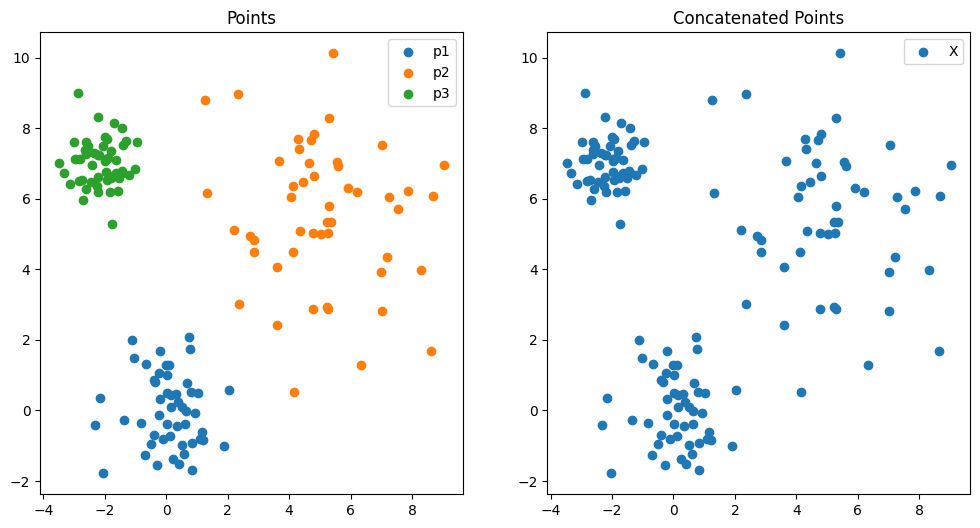

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# игрушечные данные
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=3, scale=0.6, size=(50,2)) - np.array([5, -4])
X = np.concatenate((p1, p2, p3))


def kmeans(X, k=3, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

labels, centroids = kmeans(X)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(p1[:, 0], p1[:, 1], label='p1')
axs[0].scatter(p2[:, 0], p2[:, 1], label='p2')
axs[0].scatter(p3[:, 0], p3[:, 1], label='p3')
axs[0].set_title('Points')
axs[0].legend()

axs[1].scatter(X[:, 0], X[:, 1], label='X')
axs[1].set_title('Concatenated Points')
axs[1].legend()

plt.show()

### 1
Напишите функцию, которая рассчитывает расстояния от центров кластеров до каждой точки и возвращает, к какому кластеру принадлежит каждая точка.

In [ ]:
import scipy
from scipy.spatial.distance import cdist

def kmeans_predict(X, clusters):
    distances = cdist(X, clusters, metric='euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

Посмотрим, что получается.

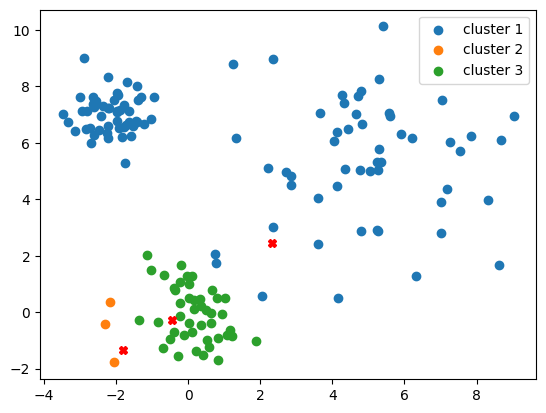

In [ ]:
# случайные координаты для центров кластеров
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))

labels = kmeans_predict(X, centroids)

plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(centroids[:, 0], centroids[:, 1], 'rX')
plt.legend()
plt.show()

### 2
Напишите код для обновления центров кластеров. Запоминайте центры кластеров для дальнейшей визуализации.

In [ ]:
centroids = np.random.normal(loc=0.0, scale=2., size=6).reshape((3, 2))
k = len(centroids)
centroids_history = [centroids] # история центров кластеров

iters = 7 # количество шагов итерации обновления центров кластеров


for i in range(iters):
    labels = kmeans_predict(X, centroids)
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

    for j in range(k):
        if np.isnan(new_centroids[j]).any():
            new_centroids[j] = centroids[j]

    centroids = new_centroids
    centroids_history.append(centroids.copy())

Посмотрим на результат.

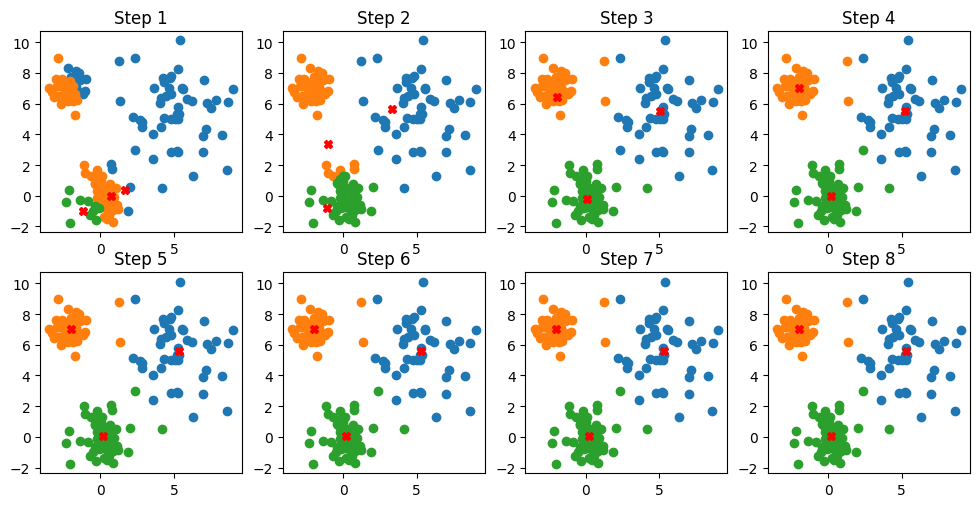

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(iters + 1):
    labels = kmeans_predict(X, centroids_history[i])
    plt.subplot((iters + 1) // 2, (iters + 1) // 2, i + 1)
    plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
    plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
    plt.plot(centroids_history[i][:, 0], centroids_history[i][:, 1], 'rX')
    # plt.legend()
    plt.title('Step {:}'.format(i + 1))

### 3

Напишите функцию обучения kMeans. Параметры:

* k - кол-во кластеров,
* max_iter - через сколько итераций нужно остановиться,
* tol - если сумма расстояний между прошлыми центрами кластеров и новыми центрами меньше tol (для всех кластеров!), то остановиться,
* low и high - это минимально и максимально значение, которое могут принимать точки центров кластеров при генерации.



Начните с генерации центров кластеров с помощью np.random.uniform. Затем на каждой итерации нужно сделать следующее:
* определить, к какому кластеру относится каждая точка,
* по точкам в кластере пересчитать центр кластера, если точек в кластере нет - сгенерировать новый случайный центр,
* посчитать loss как сумму расстояний (euclidean) между кластерами, полученными на прошлой итерации, и новыми кластерами.

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist


def kmeans_fit_predict(x, k=8, max_iter=100, tol=0.001, low=0.0, high=1.0, print_progress=False):
    n_samples, n_features = x.shape
    loss_history = []

    clusters = np.random.uniform(low=low, high=high, size=(k, n_features))

    for iteration in range(max_iter):
        distances = cdist(x, clusters, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        old_clusters = clusters.copy()

        for i in range(k):
            cluster_points = x[labels == i]

            if len(cluster_points) > 0:
                clusters[i] = cluster_points.mean(axis=0)
            else:
                clusters[i] = np.random.uniform(low=low, high=high, size=(n_features,))

        loss = np.sum(np.linalg.norm(clusters - old_clusters, axis=1))
        loss_history.append(loss)

        if print_progress:
            print(f"Итерация = {iteration + 1}, loss = {loss:.4f}")
        if loss < tol:
            break

    return clusters, labels, loss_history

Проверим работу функции.

In [ ]:
clusters, labels, loss_history = kmeans_fit_predict(X, k=3, low=0.0, high=np.max(X), print_progress=True)

Итерация = 1, loss = 11.9820
Итерация = 2, loss = 3.8733
Итерация = 3, loss = 0.5776
Итерация = 4, loss = 0.1578
Итерация = 5, loss = 0.0000


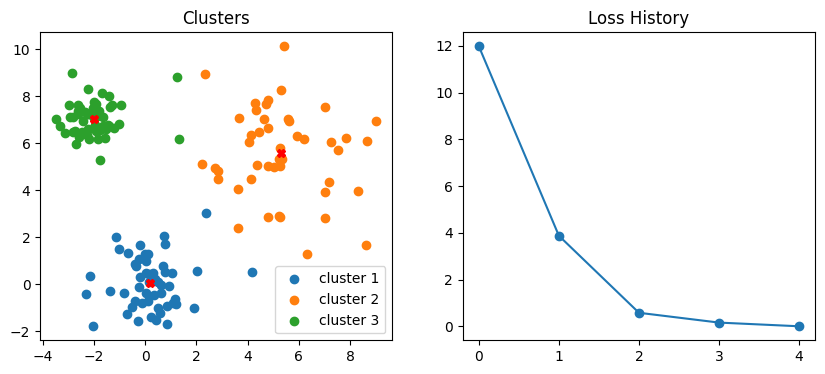

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], label='cluster 3')
plt.plot(clusters[:, 0], clusters[:, 1], 'rX')
plt.title('Clusters')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history, marker='o')
plt.title('Loss History')

plt.show()